In [1]:
import os, sys
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
import sqlite3

In [5]:
# read usage data for a building from the database
conn = sqlite3.connect('../db.sqlite3')
usage_df = pd.read_sql_query("SELECT * FROM pma_usage WHERE property_name = 'Charles Shipman Payson Building' AND meter_type = 'Potable Indoor'", conn)
#print(usage_df.head())
usage_dates = ['-'.join((date.split(' ')[0]).split('-')[:-1]) for date in usage_df['start_date']]
usage = list(usage_df['common_usage_units'])

usage_dict, temps_dict = {}, {}

weather_df = pd.read_sql_query("SELECT * FROM pma_weather", conn)
weather_dates = ['-'.join((date.split(' ')[0]).split('-')[:-1]) for date in weather_df['date']]
temp = list(weather_df['temperature'])
#print(len(weather_dates), len(temp), weather_dates[:2], temp[:2])

for date, usg in zip(usage_dates, usage):
    usage_dict[date] = usg
for date, tmp in zip(weather_dates, temp):
    temps_dict[date] = tmp
conn.close()

# dates start at Feb-2012 and end at Sep-2022
print(usage_dates[0], usage_dates[-1])
print(weather_dates[0], weather_dates[-1])

2012-02 2022-09
2000-01 2023-12


In [6]:
# get usage and temperature for all the dates in usage_dict
monthly_usage, monthly_temp = [], []
for date in usage_dict:
    if date in temps_dict:
        monthly_usage.append(usage_dict[date])
        monthly_temp.append(temps_dict[date])

['2012-02', '2012-03', '2012-04', '2012-05', '2012-06', '2012-07', '2012-08', '2012-09', '2012-10', '2012-11', '2012-12', '2013-01', '2013-03', '2013-04', '2013-05', '2013-06', '2013-07', '2013-08', '2013-09', '2013-10', '2013-11', '2013-12', '2014-01', '2014-02', '2014-03', '2014-05', '2014-06', '2014-07', '2014-08', '2014-09', '2014-10', '2014-11', '2014-12', '2015-01', '2015-02', '2015-03', '2015-04', '2015-05', '2015-06', '2015-07', '2015-08', '2015-09', '2015-10', '2015-11', '2015-12', '2016-01', '2016-02', '2016-03', '2016-04', '2016-05', '2016-06', '2016-07', '2016-08', '2016-09', '2016-10', '2016-11', '2016-12', '2017-01', '2017-02', '2017-03', '2017-04', '2017-05', '2017-06', '2017-07', '2017-08', '2017-09', '2017-10', '2017-11', '2017-12', '2018-01', '2018-02', '2018-03', '2018-04', '2018-05', '2018-06', '2018-07', '2018-08', '2018-09', '2018-10', '2018-11', '2018-12', '2019-01', '2019-02', '2019-03', '2019-04', '2019-05', '2019-06', '2019-07', '2019-08', '2019-09', '2019-10'

ValueError: x and y must have same first dimension, but have shapes (126,) and (125,)

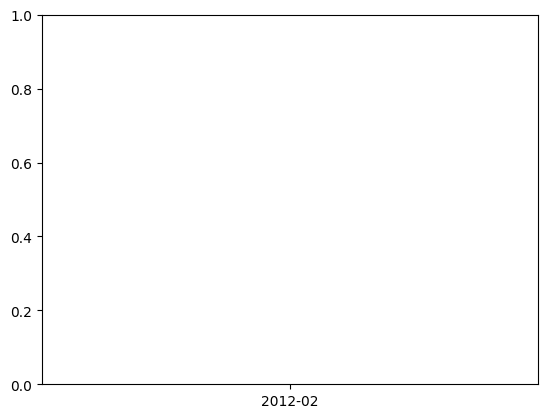

In [12]:
# plot temps; usage
print((list(usage_dict.keys())), (monthly_temp))
plt.plot(list(usage_dict.keys()), monthly_temp, label='temps')
#plt.plot(monthly_usage, label='usage')
plt.legend()
plt.show()

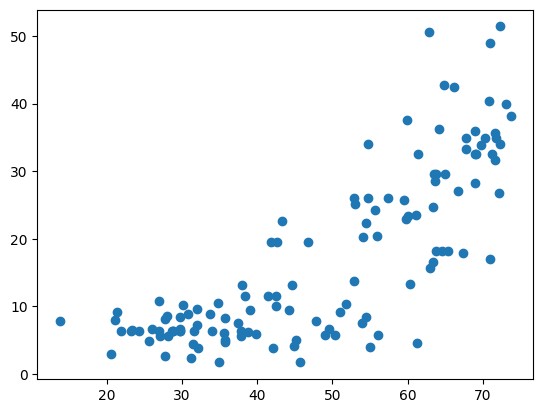

In [20]:
# plot temps on x, usage on y
plt.scatter(monthly_temp, monthly_usage)
plt.show()

In [21]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [25]:
model.fit(X=np.array(monthly_temp).reshape(-1, 1), y=np.array(monthly_usage))

LinearRegression()

In [30]:
next_months = ['2023-07', '2023-08', '2023-09', '2023-10', '2023-11', '2023-12', '2024-01', '2024-02', '2024-03', '2024-04', '2024-05', '2024-06']
temps_dict['2024-06'] = 70
temps_dict['2024-05'] = 65
temps_dict['2024-04'] = 60
temps_dict['2024-03'] = 55
temps_dict['2024-02'] = 50
temps_dict['2024-01'] = 45
temps_dict['2023-12'] = 40

next_temps = [temps_dict[date] for date in next_months]
new_usage = model.predict(np.array(next_temps).reshape(-1, 1))
total_usage = np.concatenate((monthly_usage, new_usage))
total_temps = np.concatenate((monthly_temp, next_temps))

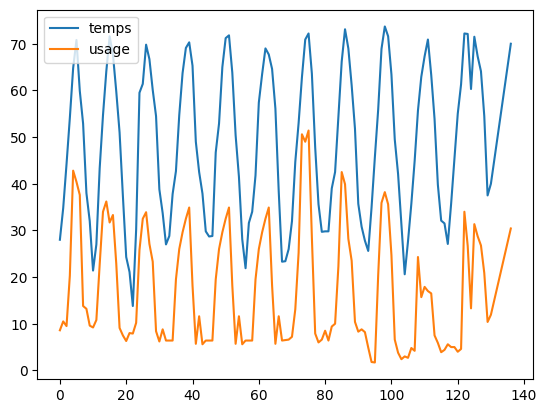

In [31]:
# plot new usage and temps
plt.plot(total_temps, label='temps')
plt.plot(total_usage, label='usage')
plt.legend()
plt.show()